<a href="https://colab.research.google.com/github/sardarabdulsammad/DeepLearning/blob/main/00_pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import numpy as np
import pandas as pd
print(torch.__version__)

2.6.0+cu124


## tensors Introduction

### Creating Tensors

In [9]:
#Starting from zero DIM tensor
#Scalar
scalar = torch.tensor(7)
scalar.ndim
scalar.item()


7

In [10]:
#vector
vector = torch.tensor([7,7])
vector.dim
vector.shape

torch.Size([2])

In [11]:
vector.shape

torch.Size([2])

In [12]:
matrix = torch.tensor([[7,8],[9,10]])
matrix.ndim

2

In [13]:
matrix = torch.tensor([[3,3],[4,4]])

In [14]:
matrix.shape

torch.Size([2, 2])

In [15]:
matrix.ndim

2

In [16]:
tensor = torch.tensor([[[1,2],[5,6]],[[3,4],[5,6,]]])

In [17]:
tensor.shape

torch.Size([2, 2, 2])


Why shape is like that,..?
- The Tensors starts from zeroth index


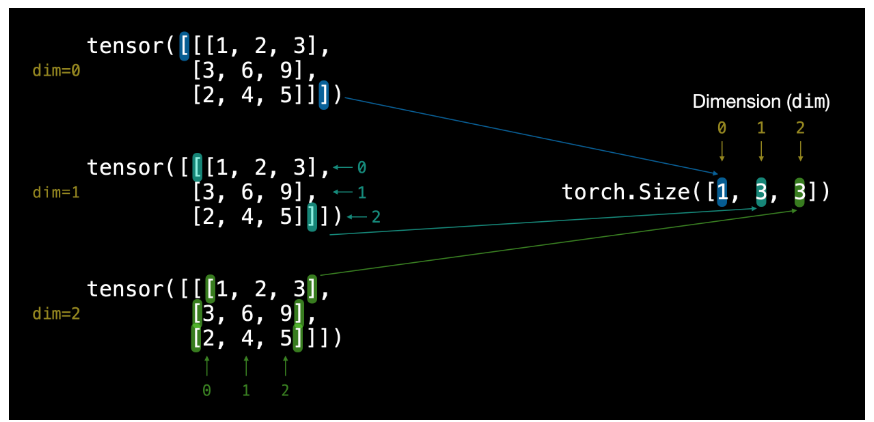
-

##Random Tensors

The Random tensors are important because the way neural network run is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data

Start with Random Number -> look at data -> update random numbers -> look at data -> update random numbers

In [18]:
#create random tensor
random_tensor = torch.rand(2,2,2)


In [19]:
random_tensor

tensor([[[0.7678, 0.1948],
         [0.7770, 0.1593]],

        [[0.5407, 0.6857],
         [0.2779, 0.6140]]])

In [20]:
random_tensor.shape

torch.Size([2, 2, 2])

Enconding is representation, Following is the way the image is represented in form of tensors.

what pytorch actually does is it generates random tensors, look at the data and change the values according to that data to better represent it

In [21]:
 #Random Tensor With shape of an image
 # encoding is representing, and common format to represent image with tensors is
 random_image = torch.rand(size = (224,224,3 )) #height, width, Colour Channel (R,G,B)

In [22]:
 random_image.shape , random_image.ndim

(torch.Size([224, 224, 3]), 3)

### zeros and Ones


 - Tensor of all zero
 - Masking can help make one part of the tensor zero, thats masking

In [23]:
#Tensor of all zeros
#zeros are usually used for masking

zero = torch.zeros(size=(3,4))
zero

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [24]:
#Tensor of all Ones

ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

Data type - dtype
Default is torch.float32
all the above are float numbers i.e 1.

In [25]:
#data type of tensors
ones.dtype,zero.dtype,random_image.dtype

(torch.float32, torch.float32, torch.float32)

# Creating Range of Tensors and tensors-like

# end will be the number - 1



In [26]:
range_tensor  = torch.arange(start=1, end = 11, step = 1)
range_tensor, range_tensor.shape, range_tensor.ndim

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.Size([10]), 1)

In [27]:
#creating tensors alike
#replicating the shape of tensors

alike_tensor = torch.zeros_like(input = range_tensor)
alike_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
alike_tensor

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor Datatypes

What is float 32 and float 16 what are these numbers?

They have to do with precision in computing, The precision is the numerical quanity, it is measure of the detail in which the quantity is expressed, usually measure in bits

torch.float32 = computers stores the number as 32-bit floating point

Why to lower the precious.
Sometimes one sacrifices the detail in order to calculate fast.

#Tensor Datatypes is one of the 3 big erros one can run into with pytorch and deep learning

1. Tensors not right datatype (Some Ops may not work)
2. Tensors not right Shape
3. Tensors not on the right device



In [29]:
#Tensor Datatypes
#Default Datatype for tensor is float32
float_32_tensor  = torch.tensor([3.0,4.0,5.0],
                                dtype = None, #The data type of the tensors
                                device = 'cpu', #what device the tensor is on
                                requires_grad = False) #whether or not track gradients with this tensors operations
float_32_tensor.dtype

torch.float32

In [30]:
#Changing the datatype of tha tensor

float_16_tensor = float_32_tensor.type(torch.int32)
float_16_tensor.dtype

torch.int32

In [31]:
float_16_tensor*float_32_tensor

tensor([ 9., 16., 25.])

In [32]:
#Getting Shape, Data Type and Device of a Tensor
#Tensor Attributes, these are not functions
float_16_tensor.dtype,float_16_tensor.shape,float_16_tensor.device

(torch.int32, torch.Size([3]), device(type='cpu'))

In [33]:
#Creating a random tensor with a datatype

rand = torch.rand(size = (1,3), dtype = torch.float16)
rand

tensor([[0.6597, 0.9365, 0.1904]], dtype=torch.float16)

In [34]:
#Manipulating Tensors (Tensors Operations)
tensor_ops = torch.rand(1,3)
tensor_ops + 100,tensor_ops * 100,tensor_ops - 100

(tensor([[100.1741, 100.0120, 100.9073]]),
 tensor([[17.4055,  1.1996, 90.7260]]),
 tensor([[-99.8259, -99.9880, -99.0927]]))

In [35]:
tensor_ops + 100

tensor([[100.1741, 100.0120, 100.9073]])

In [36]:
tensor_ops * 100

tensor([[17.4055,  1.1996, 90.7260]])

In [37]:
tensor_ops - 10

tensor([[-9.8259, -9.9880, -9.0927]])

## Two type of multiplication


###Element Wise
######(done above)

###Matrix multiplication ( dot p)
#### Two rules must be following
####1. Inner Dimension must match
####2. Resulting Matrix Will be in outer Dimention

In [38]:

tensor = torch.tensor([1,2,3])
tensor * tensor,torch.matmul(tensor,tensor) ,tensor.shape

(tensor([1, 4, 9]), tensor(14), torch.Size([3]))

In [39]:
tensor_ops2 = torch.rand(size = (3,2))
#torch.mm(tensor_ops,tensor_ops)
#Error as inner dimensions donot match


In [40]:

tensor2 = tensor_ops2.T
tensor2.shape,tensor_ops2.shape
tensor3 = torch.matmul(tensor2, tensor_ops2)
#now with transpose we could now multiply

In [41]:
tensor3

tensor([[1.5047, 1.0142],
        [1.0142, 0.8897]])

##Tensor Aggregation (Finding min,max, mean, sum)

In [43]:
tensor_agg = torch.arange(0,100,10)
tensor_agg, tensor_agg.max(), tensor_agg.min()

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), tensor(90), tensor(0))

In [44]:
#tensor_agg.mean()
#Error because tensor_agg have datatype
# Now finding the right Datatype is crucial here
# as we know tensor_agg have datatype long but mean function could be in float the datatypes are not matching hence we have to convert it to float
torch.mean(tensor_agg.type(torch.float32)) , tensor_agg.mean(dtype=torch.float32)

(tensor(45.), tensor(45.))

## Finding the positional min and max
## Index of  min and max

In [45]:
tensor_agg.argmin()

tensor(0)

In [46]:
tensor_agg.argmax()

tensor(9)

## Reshaping, Stacking, Squeezing and Unsqueezing

* Reshaping - Reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape but keep the same memory as the original torch.tensor
* Stacking - Combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - Removes all '1' dimensions from a tensor
* Unsqueeze - Add a '1' dimension to a target tensor
* Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [59]:
#Reshaping

import torch
x= torch.arange(1,10)
x

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
x.shape

torch.Size([9])

In [61]:
#adding an extra dimension,
#When changing the dimensions, new dimensions should be compatible with the original dimension

x.reshape(1,1,9)
#x.reshape(7,1) this will not be working because we have invalid input size of 9
#if you look carefully at x above we can just add extra dimensions not change the existing dimension

tensor([[[1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [62]:
z=x.view(1,9) #same as reshape but new shape will have same reference as old one. i.e z will share the same memory as x
z

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [63]:
#stacking
#default dimension is 0, its vertical stack

x_stacked = torch.stack([x,x,x,x])

In [64]:
x_stacked

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9],
        [1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [65]:
x_stacked = torch.stack([x,x,x,x], dim = 1) #hstack
x_stacked

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3],
        [4, 4, 4, 4],
        [5, 5, 5, 5],
        [6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8],
        [9, 9, 9, 9]])

In [66]:
#squeeze removes all single dimensions
x, x.size()

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [78]:
#since x has the single dimension of size 9 it has no 1 dimension so no effect will be of squeeze function
n_new = x.reshape(1,9)
n_new.size()

torch.Size([1, 9])

In [81]:
x_new2 = n_new.squeeze()
x_new2, x_new2.size()

(tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9]))

In [93]:
check = x_new2.unsqueeze(dim = 1)
check, check.size()

(tensor([[1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7],
         [8],
         [9]]),
 torch.Size([9, 1]))

In [94]:
#permutation
#rearranges the dimension of target order in a specified order
#in pytorch i sort of works like a rearrange
img_tens  = torch.rand(size = (224,244,3))


In [97]:
img_tens.size()

torch.Size([224, 244, 3])

In [98]:
img_tens.permute(2,0,1).size()

torch.Size([3, 224, 244])

##Permutation

####permutation is a view that means it shares the same memory as the original tensor

In [ ]:

import torch
image_tensor = torch.rand(size = (224,224,3))

In [ ]:
permuted_ = image_tensor.permute(2,0,1)
permuted_.size()

torch.Size([3, 224, 224])

##Indexing

####Selecting Data from tensors with indexing

#similar to that of numpy

In [117]:
import torch

x = torch.arange(1,10).reshape(1,3,3)
x, x.size()

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
image_tensor[0,0,0] , permuted_[0,0,0]

(tensor(0.0800), tensor(0.0800))

##numpy to pytorch
#### torch.from_numpy(ndarray)
##pytorch to numpy
#### torch.tensor.numpy()


###numpy default datatype is float64 and torch datatype is float 32


In [123]:
#numpy to torch = torch.from_numpy
#tensor to numpy > torch.Tensor.numpy
import numpy as np
array  = np.arange(1.0,8.0)
tensor_ =torch.from_numpy(array)
array, tensor_,tensor_.dtype

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64),
 torch.float64)

In [125]:
tensor_.type(torch.float32)

tensor([1., 2., 3., 4., 5., 6., 7.])

##Reproducibility
####Trying to take out random out of random
'Start with random numbers - > performs tensor operations -> update random numbers to make them better representation of the data -> again '


#### but Randomization is also a problem, and to reduce randomness in neural network and pytorch their comes a concept of **random seed**

meaning that
In torch it is called **manual seed**

In [126]:
import torch

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_seed_tensor1 = torch.rand(size=(3,4))
#To make sure that tensor is random with the seed you need to put this manual_seed line above
#it works only one block of code that is why it is called again
torch.manual_seed(RANDOM_SEED)
random_seed_tensor2 = torch.rand(size=(3,4))
print(random_seed_tensor1)
print(random_seed_tensor2)
print(random_seed_tensor1 == random_seed_tensor2)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running Tensors and pytorch objects on GPUs



### 1. Getting a GPU

1 - Use google collab pro
2 - Use your own
3 - Use cloud computing - GCP AWS or AZURE
for 2 and 3 takes little bit of setup > for that you can go to pytorch.org

In [130]:
#2. Some device agnostic code below
import torch

torch.cuda.is_available()

False

In [129]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [131]:
torch.cuda.device_count()

0

## 3. putting tensors and models on GPU

In [ ]:
tensor = torch.tensor([1,2,3])
print(tensor , device)

tensor([1, 2, 3]) cpu


In [133]:
#Move tensor to GPU if avilable
#you can make a device of GPU
tensor_to_gpu = tensor.to(device)
tensor_to_gpu

tensor([1, 2, 3])

In [134]:
#4. Moving Tensors back to CPU
# numpy only works with cpu so for tensor to change in numpy you need to change them to cpu
#as well if they are on gpu
tensor_back_on_cpu = tensor_to_gpu.cpu()
tensor_back_on_cpu.numpy()




array([1, 2, 3])

**Exercise**

In [143]:
random_seed = 42
torch.manual_seed = random_seed
random_tensor = torch.rand(size=(7,7))
random_tensor2 = torch.rand(size=(1,7))
random_tensor2 = random_tensor2.T
random_tensor3 = torch.mm(random_tensor,random_tensor)
decive = 'cuda' if torch.cuda.is_available else 'cpu'
torch.cuda.device_count()

0